# Pandenomics

## The Bruhs' Progress Report

* Aleksandar Kartelyan
* Karan Shah
* Ramzi Rimawi
* Thomas Sobczak
* Ryan Thommes

## Project Introduction
The pandemic has caused inflation across the nation, thus increasing cost in all stages in production of goods. Inflation and increased prices of goods and services affects everyone in the country from workers to businesses to everyday people. Our goal is to analyze different impacts the COVID-19 pandemic has had on the economy and the nation overall. And our question is, How has the COVID-19 pandemic caused prices to increase in the US?

## Data Cleaning
### Show clearly how you cleaned your data

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

data_cols = ['Year','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','HALF1','HALF2']

data = pd.read_csv("CPI-U.csv", names=data_cols)
data = data.iloc[1: , :]
data.drop(data.iloc[:, 13:15], inplace = True, axis = 1)
data = data.replace(r'^\s*$', np.nan, regex=True)
data.head(4) #rows 1-4 shows years 2000-2003, but the data goes from 2000 - 2022

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0
2,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7
3,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9
4,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3


## Exploratory Data Analysis
The following barplots show a simple comparison of the average CPI per month in pre-covid years and CPI after covid hit in 2020. It is clearly visible that CPI is higher in years after covid. Not only that, it can also be inferred that the CPI has increased as the year goes on, in years after 2020.

## Data Visualization

Text(0, 0.5, 'Average CPI')

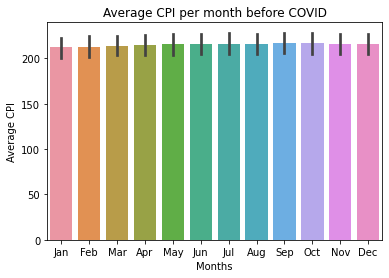

In [45]:
pre_covid_yrs = data[(data['Year'] <= '2019')].astype(float)
covid_yrs = data[(data['Year'] > '2019') & (data['Year'] < '2022')].astype(float)

pre_covid_yrs.drop('Year', axis=1, inplace=True)
covid_yrs.drop('Year', axis=1, inplace=True)

p = sns.barplot(data = pre_covid_yrs)
p.set(title='Average CPI per month before COVID')
p.set_xlabel("Months")
p.set_ylabel("Average CPI")




Text(0, 0.5, 'Average CPI')

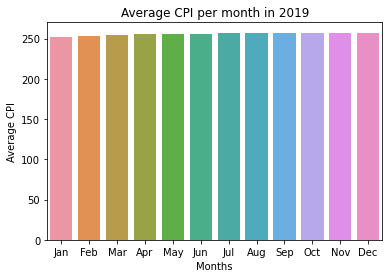

In [46]:
cpi_2019 = data[(data['Year'] == '2019')].astype(float)

cpi_2019.drop('Year', axis=1, inplace=True)

p = sns.barplot(data = cpi_2019)
p.set(title='Average CPI per month in 2019')
p.set_xlabel("Months")
p.set_ylabel("Average CPI")



Text(0, 0.5, 'Average CPI')

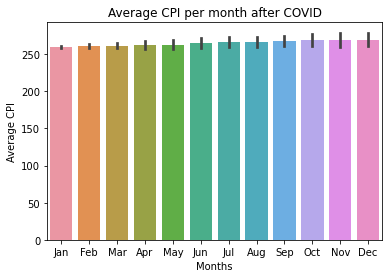

In [47]:
pn = sns.barplot(data = covid_yrs)
pn.set(title='Average CPI per month after COVID')
pn.set_xlabel("Months")
pn.set_ylabel("Average CPI")

[Text(0.5, 0, 'Years'),
 Text(0, 0.5, 'Average CPI'),
 Text(0.5, 1.0, 'Average CPI per year 2013-2022')]

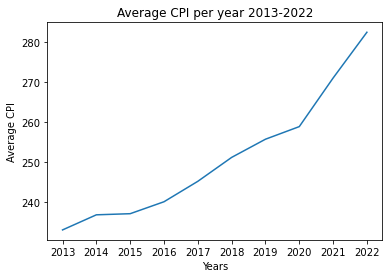

In [49]:
#Average CPI values per year for the last 10 years
#Visualized in a line graph

covid = data.astype(float)
covid.drop('Year', axis=1, inplace=True)

covid['average'] = covid.mean(axis=1)
covid.drop(covid.iloc[:, 0:12], inplace=True, axis=1)
data_cols = ['2013','2014','2015', '2016',
            '2017', '2018', '2019', '2020', '2021', '2022']
a=sns.lineplot(data=covid[-10:], x=data_cols, y="average")
a.set(xlabel="Years", ylabel="Average CPI", title='Average CPI per year 2013-2022')

## ML Analysis

In [50]:
a = []
b = []
c = [2020, 2021, 2023]
data[data['Year'] == '2019'].astype(float).aggregate(func = 'average')
for x in range(2000,2020):
    a.append(float(x))
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    b.append(pd.aggregate(func = 'average'))
a = np.array(a).reshape(-1, 1)
b = np.array(b).reshape(-1, 1)
c = np.array(c).reshape(-1, 1)


linear_regressor = LinearRegression()  # create object for the class

linear_regressor.fit(a, b)  # perform linear regression
Y_pred = linear_regressor.predict(c)  # make predictions
print("Regression Prediction")
print(Y_pred)


pd = data[data['Year'] == '2018'].astype(float)
pd.drop('Year', axis=1, inplace=True)
cpi_2018 = pd.aggregate(func = 'average')
print('Average CPI 2018: ', str(cpi_2018))

pd = data[data['Year'] == '2019'].astype(float)
pd.drop('Year', axis=1, inplace=True)
cpi_2019 = pd.aggregate(func = 'average')
print('Average CPI 2019: ', str(cpi_2019) + "\n")

rate = cpi_2019/cpi_2018

for x in range(2020,2023):
    cpi_2019 = rate * cpi_2019
    print("Baseline Prediction for " + str(x) + ": " + str(cpi_2019))

print()    
    
for x in range(2020,2022):
    pd = data[data['Year'] == str(x)].astype(float)
    pd.drop('Year', axis=1, inplace=True)
    print("Average CPI for " + str(x) + ": " + str(pd.aggregate(func = 'average')))
    
    
print("Average CPI for 2022 so far: " + str((281.148 + 283.716) / 2))

Regression Prediction
[[261.28870044]
 [265.66267945]
 [274.41063747]]
Average CPI 2018:  251.10683333333338
Average CPI 2019:  255.65741666666668

Baseline Prediction for 2020: 260.29046612964976
Baseline Prediction for 2021: 265.00747618179275
Baseline Prediction for 2022: 269.8099683653517

Average CPI for 2020: 258.8111666666667
Average CPI for 2021: 270.96975000000003
Average CPI for 2022 so far: 282.432


## Reflection
* What is hardest part of the project that you’ve encountered so far?
    - One of the biggest difficulties thus far has been finding the data that works best for the problem we're trying to solve. With this in mind, we may have to be more adaptive with what we are looking for and how to properly display that data to cater to our needs.
* What are your initial insights?
    - We may have to find additional data specific to particular industries rather than just using raw CPI data for this.
* Are there any concrete results you can show at this point? If not, why not?
    - There are some patterns that we are witnessing but as of right now, it is difficult to order them in a way that would help prove claims we make. But, we did come up with pretty good visualizations and a nice ML Analysis which show how drastically prices have increased since the COVID pandemic.
* Going forward, what are the current biggest problems you’re facing?
    - Some of the biggest problems we're facing involve understanding and displaying the data in a way beneficial to our claims. As it stands right now, we are struggling to decide which data is most helpful to use.
* Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?
    - We feel like we are on track with the project. However, we should dedicate more time to finding supplementary results and conclusions to better support our problem.
* Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
    - Yes, it is worth proceeding with our project because we've been making good progress so far and we've been able to clean data and write code which has given us some insightful results which display price increases from COVID.

## Next steps
(What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.)

 - Clean and test out more data sets to see what other results/industries can show us
 - Try to see how we can incorporate other data into our existing code
 - Adapt newfound data into visualizations that help illustrate our points
 - Review claims after analyzing the data to come to more definitive conclusions
 - Incorporate everything thus far into the presentation
 - Prepare for the final project submission 
 